# Preprocessing Hourly Dam Operation Data

### 1. Import Required Python Libraries

In [1]:
import pandas as pd
import datetime
from datetime import timedelta
from pylab import rcParams
import seaborn as sns
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

### 2. Read Hourly Dam Operation Data

<div class="alert alert-success">
Read Hourly Dam Operation Data that obtained from DAON database system in K-water </div>

<div class="alert alert-success">
OBSDH: 관측일시, IQTY: 유입량, TDQTY: 총방류량, DAMBSARF: 댐_유역평균우량, EDQTY: 발전방류량, SPDQTY: 여수로방류량, ETCDQTY2: 기타방류량2 </div>

In [2]:
obs_folder_name = "YD_DAM_Upstream"
raw_data_folder = os.path.join(os.getcwd(), obs_folder_name, "raw_data")
os.listdir(raw_data_folder)

['YD_DAM_Upstream_WaterLevel_Daily.csv',
 '1_YD_DAM_Upstream_Rainfall_Observation_Periods.csv',
 'YD_DAM_Operation_Data_Daily.csv',
 '2_YD_DAM_Upstream_WaterLevel_Observation.xlsx',
 'YD_DAM_Upstream_WaterLevel_Hourly.csv',
 'YD_DAM_Upstream_Rainfall_Daily.csv',
 'YD_DAM_Operation_Data_Hourly.csv',
 'YD_DAM_Upstream_Rainfall_Hourly.csv']

In [3]:
all_obs_df = pd.read_csv(os.path.join(raw_data_folder, "YD_DAM_Operation_Data_Hourly.csv"))
all_obs_df.head()

,OBSDH,IQTY,TDQTY,DAMBSARF,EDQTY,SPDQTY,ETCDQTY2
0,2001050416,0.0,0.0,0.0,0.0,0.0,NaN
1,2001050417,0.0,0.0,0.0,0.0,0.0,NaN
2,2001050418,0.0,0.0,0.0,0.0,0.0,NaN
3,2001050419,0.0,0.0,0.0,0.0,0.0,NaN
4,2001050420,0.0,0.0,0.0,0.0,0.0,NaN


In [4]:
all_obs_df.tail()

,OBSDH,IQTY,TDQTY,DAMBSARF,EDQTY,SPDQTY,ETCDQTY2
198998,2024011615,9.640,26.751,0.0,10.951,0.0,0.0
198999,2024011616,8.788,26.760,0.0,10.953,0.0,0.0
199000,2024011617,5.349,26.766,0.0,10.955,0.0,0.0
199001,2024011618,12.238,26.766,0.0,10.950,0.0,0.0
199002,2024011619,15.624,26.763,0.0,10.950,0.0,0.0


### 3. Set DateTime Data Format and Observation Periods 

<div class="alert alert-success">
Change "datetime data format" from string to Pandas datetime format </div>

In [5]:
def datetime_format(df):
    dt_series = []
    for date in df['OBSDH']:
        day = int(str(date)[6:8])
        time = int(str(date)[8:10])
        if int(str(date)[8:10]) == 24:
            time = 0
            datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), day, 0, 0)
            datetimeobj = datetimeobj + timedelta(days=1)
        else:
            datetimeobj = datetime.datetime(int(str(date)[0:4]), int(str(date)[4:6]), day, time, 0)
        dt_series.append(datetimeobj)
    # date의 날짜를 datetime 포맷으로 변경
    df["date"] = dt_series
    return df

<div class="alert alert-success">
Change "date data format" from string to Pandas datetime format </div>

In [6]:
all_obs_df = datetime_format(all_obs_df)
all_obs_df[0:3]

,OBSDH,IQTY,TDQTY,DAMBSARF,EDQTY,SPDQTY,ETCDQTY2,date
0,2001050416,0.0,0.0,0.0,0.0,0.0,NaN,2001-05-04 16:00:00
1,2001050417,0.0,0.0,0.0,0.0,0.0,NaN,2001-05-04 17:00:00
2,2001050418,0.0,0.0,0.0,0.0,0.0,NaN,2001-05-04 18:00:00


<div class="alert alert-success">
Check Observation Periods to create Date Dataframe </div>

In [7]:
all_obs_df["date"].min(), all_obs_df["date"].max()

(Timestamp('2001-05-04 16:00:00'), Timestamp('2024-01-16 19:00:00'))

<div class="alert alert-success">
Create Total Date Periods using Max and Min date above </div>

In [8]:
total_date_df = pd.DataFrame(
    {'date': pd.date_range(start=all_obs_df["date"].min(), end=all_obs_df["date"].max(), freq='1H'),
    }
)
print(len(total_date_df))
total_op_df = total_date_df
total_date_df.head()

199012


,date
0,2001-05-04 16:00:00
1,2001-05-04 17:00:00
2,2001-05-04 18:00:00
3,2001-05-04 19:00:00
4,2001-05-04 20:00:00


### 4. Preprocess Hourly Dam Operation Data

<div class="alert alert-success">
<b> Merge Observed dam operation data to Total Data Periods created the previous cell </div>

In [9]:
total_df = pd.merge(total_op_df, all_obs_df, on="date", how="left")
total_op_df_f = total_df.set_index("date")
total_op_df_f

,OBSDH,IQTY,TDQTY,DAMBSARF,EDQTY,SPDQTY,ETCDQTY2
date,,,,,,,
2001-05-04 16:00:00,2.001050e+09,0.000,0.000,0.0,0.000,0.0,NaN
2001-05-04 17:00:00,2.001050e+09,0.000,0.000,0.0,0.000,0.0,NaN
2001-05-04 18:00:00,2.001050e+09,0.000,0.000,0.0,0.000,0.0,NaN
2001-05-04 19:00:00,2.001050e+09,0.000,0.000,0.0,0.000,0.0,NaN
2001-05-04 20:00:00,2.001050e+09,0.000,0.000,0.0,0.000,0.0,NaN
...,...,...,...,...,...,...,...
2024-01-16 15:00:00,2.024012e+09,9.640,26.751,0.0,10.951,0.0,0.0
2024-01-16 16:00:00,2.024012e+09,8.788,26.760,0.0,10.953,0.0,0.0
2024-01-16 17:00:00,2.024012e+09,5.349,26.766,0.0,10.955,0.0,0.0


<div class="alert alert-success">
<b> Select Required Time Periods </div>

In [10]:
selected_op_df_f = total_op_df_f.loc["2001-10-01":"2023-09-30"]
selected_op_df_f.head()

,OBSDH,IQTY,TDQTY,DAMBSARF,EDQTY,SPDQTY,ETCDQTY2
date,,,,,,,
2001-10-01 00:00:00,2.001093e+09,15.9,22.6,0.1,7.8,0.0,14.8
2001-10-01 01:00:00,2.001100e+09,22.2,22.3,0.1,7.5,0.0,14.8
2001-10-01 02:00:00,2.001100e+09,21.9,22.5,0.0,7.7,0.0,14.8
2001-10-01 03:00:00,2.001100e+09,22.2,22.5,0.0,7.7,0.0,14.8
2001-10-01 04:00:00,2.001100e+09,20.1,22.5,0.1,7.7,0.0,14.8


<div class="alert alert-success">
Check Missing Data in stations </div>

In [11]:
print(len(selected_op_df_f[selected_op_df_f.isna().any(axis=1)]))

162


<div class="alert alert-success">
Plotting Missing data </div>

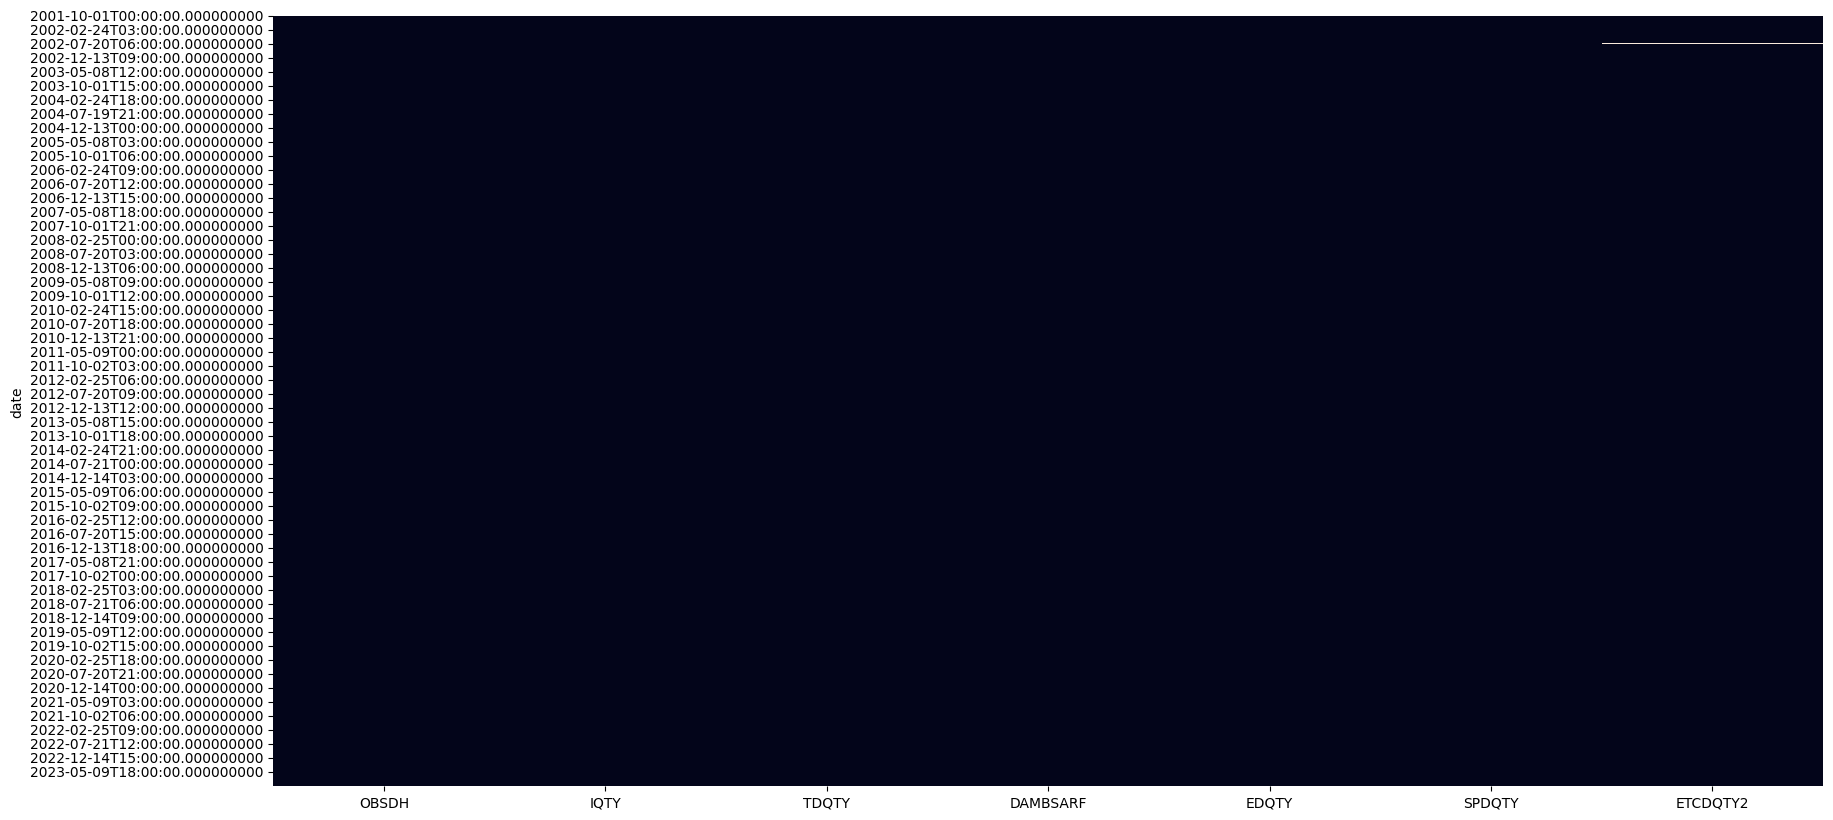

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_op_df_f.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/operation_dam_missing_hourly.png", bbox_inches='tight')
plt.show()

### 5. Plot Hourly Dam Operation Data

<div class="alert alert-success">
Plotting Hourly Dam Operation Data </div>

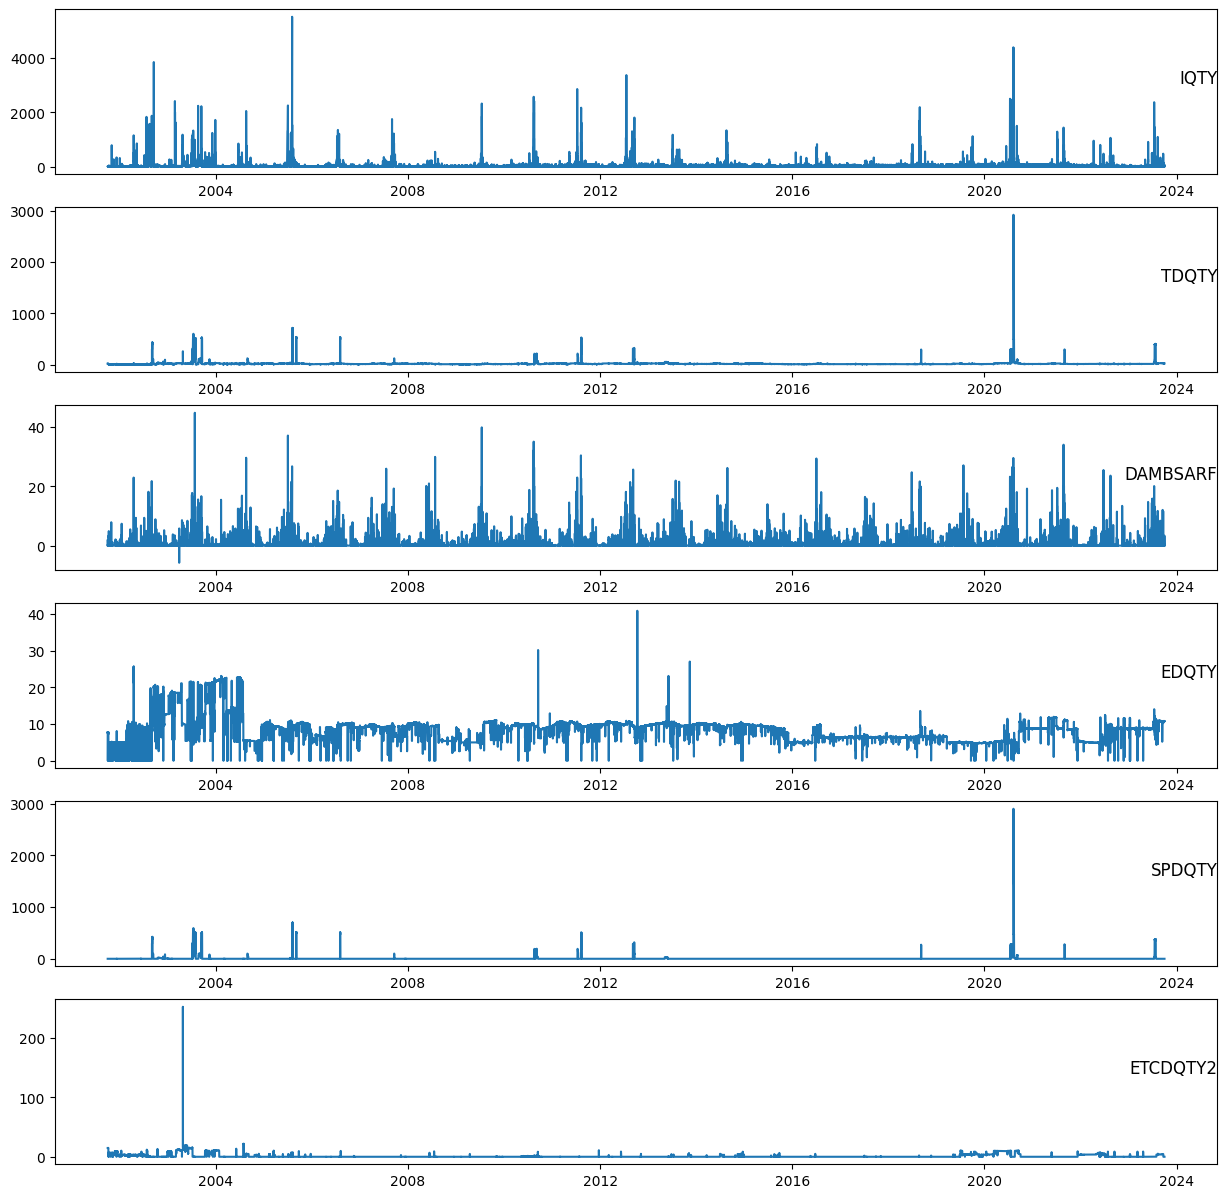

In [13]:
rcParams['figure.figsize'] = 15, 15
values = selected_op_df_f.values
groups = [*range(1,len(selected_op_df_f.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_op_df_f.index,  values[:, group])
    plt.title(selected_op_df_f.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/operation_dam_ts_hourly.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Interpolating missing data using Pandas library </div>

In [14]:
selected_op_df_f_revised = selected_op_df_f
col_name = list(selected_op_df_f_revised)
selected_op_df_f_revised[col_name] = selected_op_df_f_revised[col_name].interpolate(method="pad")
selected_op_df_f_revised[selected_op_df_f_revised.isna().any(axis=1)]

,OBSDH,IQTY,TDQTY,DAMBSARF,EDQTY,SPDQTY,ETCDQTY2
date,,,,,,,


<div class="alert alert-success">
Check missing data </div>

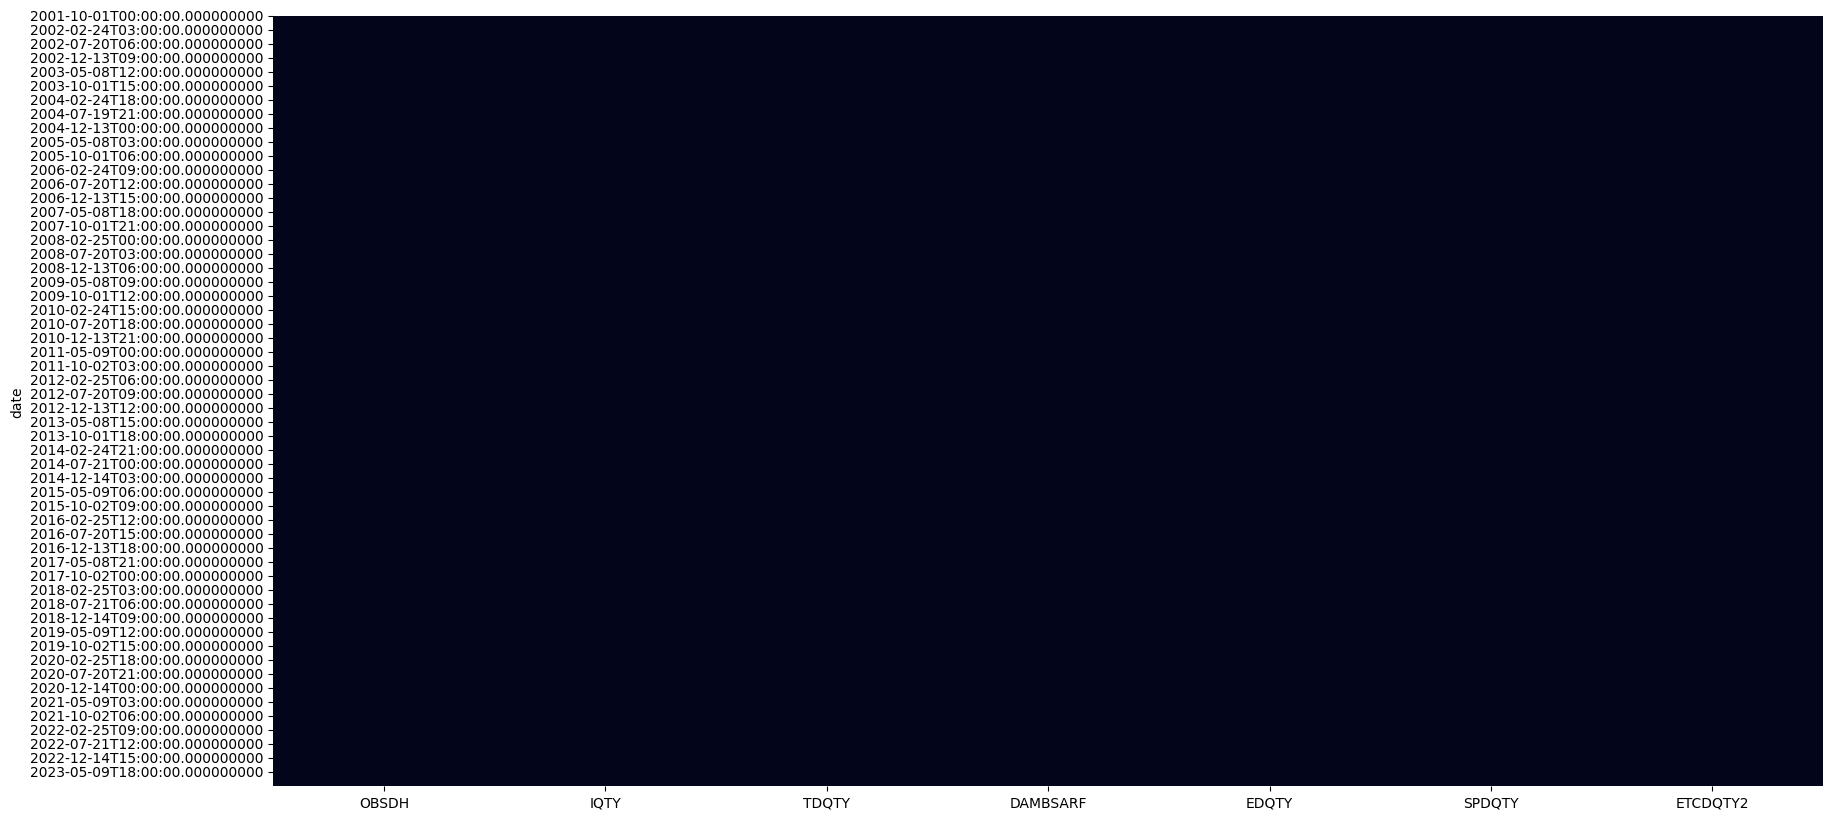

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(selected_op_df_f_revised.isnull(), cbar=False)
plt.savefig(os.getcwd() + "/" + obs_folder_name + "/operation_dam_missing_hourly_revised.png", bbox_inches='tight')
plt.show()

<div class="alert alert-success">
Plotting Revised Hourly Dam  (that has no missing data) in selected stations </div>

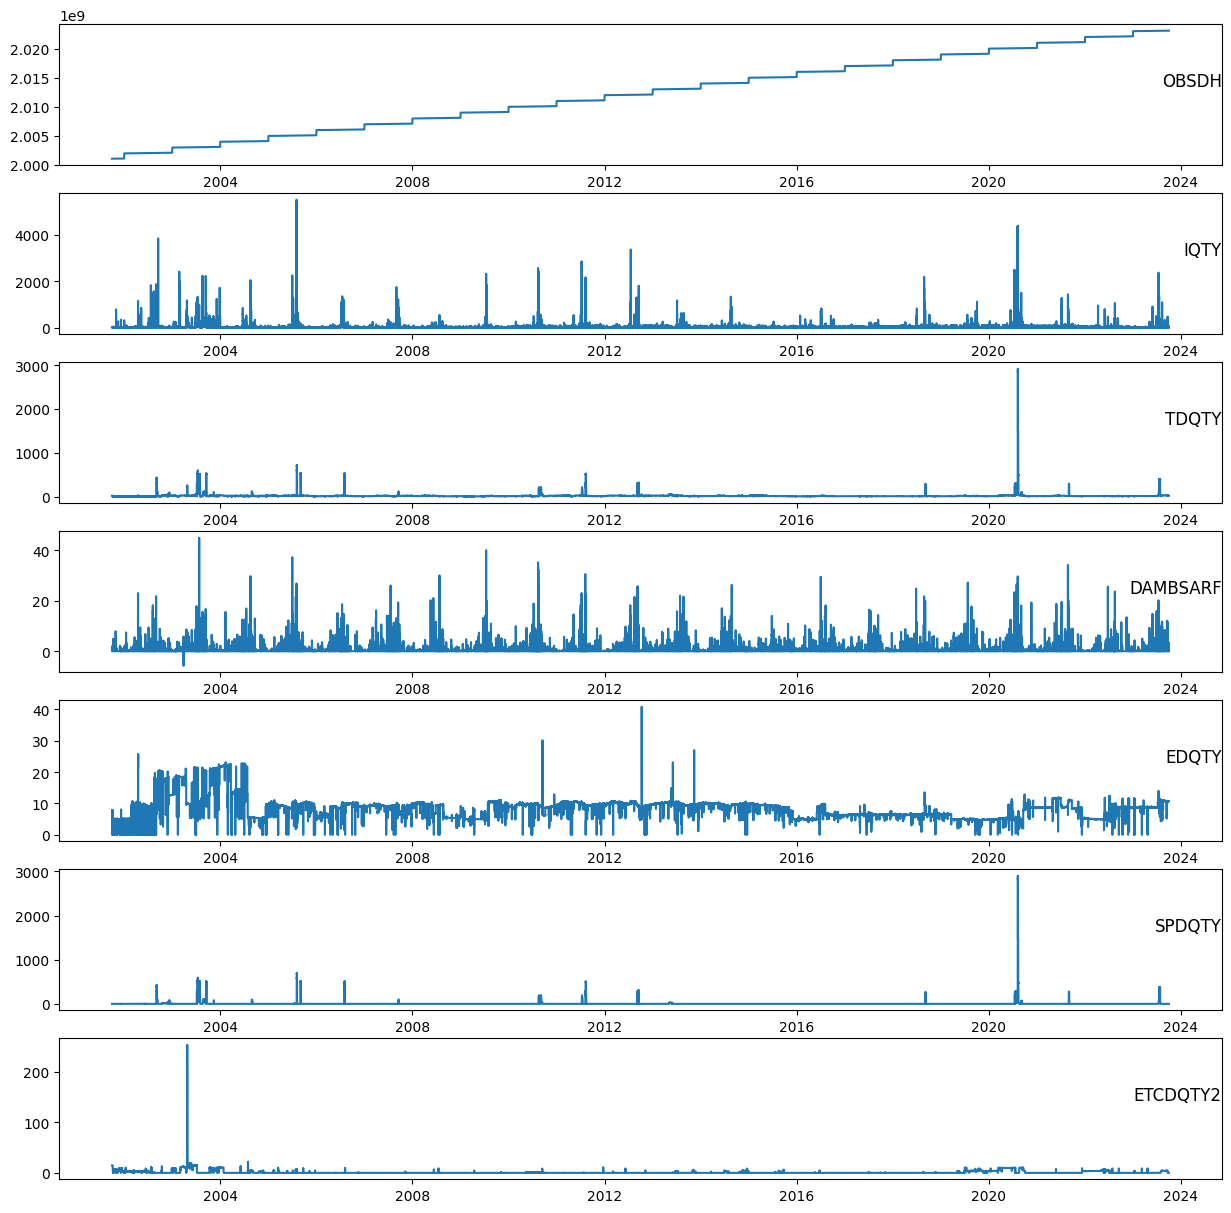

In [16]:
rcParams['figure.figsize'] = 15, 15
values = selected_op_df_f_revised.values
groups = [*range(0,len(selected_op_df_f_revised.columns), 1)]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(selected_op_df_f_revised.index,  values[:, group])
    plt.title(selected_op_df_f_revised.columns[group], y=0.5, loc='right')
    i += 1

plt.savefig(os.getcwd() + "/" + obs_folder_name + "/operation_dam_ts_hourly_revised.png", bbox_inches='tight')
plt.show()

### 6. Save Hourly Dam Operation Data as CSV format

In [17]:
selected_op_df_f.to_csv(os.getcwd() + "/" + obs_folder_name + "/YD_Dam_Operation_Hourly_f.csv")

### 7. Creating Model Input using observation data